In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(191)

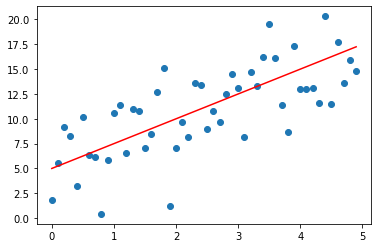

In [156]:
x = np.arange(0, 5, 0.1)
y = np.array([5+2.5*a for a in x])
y = y + np.random.normal(0, 3.1, len(x))

plt.scatter(x, y)
plt.plot(x, [5+2.5*a for a in x], 'red')

In [209]:
from math import sqrt


class linear_model:
    def __init__(self, x, y, b0_step=50, b1_step=1, stop_b0=0.00001, stop_b1=0.00001):
        self.x = x
        self.y = y
        self.b0_step = b0_step
        self.b0_step_sign = 1
        self.b1_step = b1_step
        self.b1_step_sign = 1
        self.stop_b0 = stop_b0
        self.stop_b1 = stop_b1
        self.b0 = 0
        self.b1 = 0
        self.former_b0 = 0
        self.former_b1 = 0
    
    def give_score(self, p1, p2):
        n = len(self.y)-2
        e1 = sqrt(sum((self.y-p1)**2)/n)
        e2 = sqrt(sum((self.y-p2)**2)/n)
        return e1-e2
    
    def init_b0(self):
        ''' Define the sign of the step. We want to know the direction.'''
        pred1 = self.b0_step
        pred2 = -self.b0_step
        
        score = self.give_score(pred1, pred2)
        
        if score > 0:
            self.b0_step_sign = -1
    
    def find_b0(self):
        step = self.b0_step*self.b0_step_sign
        
        pred1 = self.b1 * self.x + self.b0
        pred2 = self.b1 * self.x + self.b0 + step
        
        score = self.give_score(pred1, pred2)
        # print('b0: ', self.b0, score)
        
        if score > 0:
            self.former_b0 = self.b0
            self.b0 = self.b0 + step
        else:
            self.b0_step = self.b0_step/2*self.b0_step_sign
            
    def init_b1(self):
        pred1 = self.x * self.b1_step
        pred2 = self.x * self.b1_step * -1
        score = self.give_score(pred1, pred2)
        
        if score > 0:
            self.b1_step_sign = -1
            
    def find_b1(self):
        step = self.b1_step * self.b1_step_sign

        pred1 = self.b1 * self.x + self.b0
        pred2 = (self.b1+step) * self.x + self.b0
        
        score = self.give_score(pred1, pred2) 
        # print('b1: ', self.b1, score)
        if score > 0:
            self.former_b1 = self.b1
            self.b1 = self.b1 + step
        else:
            self.b1_step = self.b1_step/2*self.b1_step_sign
    
    def train(self):        
        self.init_b0()
        self.init_b1()      
        
        while (self.b0 != self.former_b0 and self.b1 != self.former_b1) != True:
            self.find_b1()
            self.find_b0()
            
        print(f'Model as been fitted y = {self.b0} + {self.b1}*x')
        
    
    def predict(self, value):
        self.prediction = self.b0 + self.b1*value
        return self.prediction
    
    def parameters(self):
        return self.b0, self.b1
    

Model as been fitted y = 1.5625 + 4*x


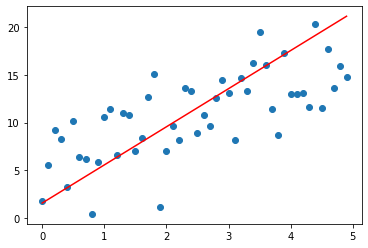

In [210]:
model = linear_model(x, y)
model.train()
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'red')
plt.show()

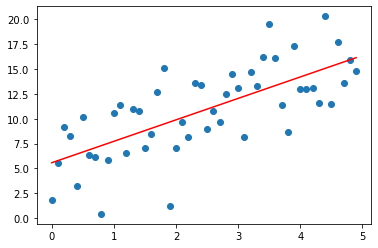

In [174]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x.reshape(-1, 1), y.reshape(-1, 1))


plt.scatter(x, y)
plt.plot(x, reg.predict(x.reshape(-1, 1)), 'red')
plt.show()

In [193]:
reg.intercept_, reg.coef_

(array([5.5771408]), array([[2.15886922]]))

In [181]:
param = model.parameters()
param

(1.5625, 4)

In [184]:
prediction = [param[0] + param[1]*a for a in x]
e = sqrt(sum((y - prediction)**2)/(len(y)-2))
e

4.231203262733159

In [194]:
prediction = [5.5771408 + 2.15886922*a for a in x]
e = sqrt(sum((y - prediction)**2)/(len(y)-2))
e

3.2083278257010686

In [192]:
prediction

[array([5.5771408]),
 array([5.79302773]),
 array([6.00891465]),
 array([6.22480157]),
 array([6.44068849]),
 array([6.65657542]),
 array([6.87246234]),
 array([7.08834926]),
 array([7.30423618]),
 array([7.5201231]),
 array([7.73601003]),
 array([7.95189695]),
 array([8.16778387]),
 array([8.38367079]),
 array([8.59955772]),
 array([8.81544464]),
 array([9.03133156]),
 array([9.24721848]),
 array([9.4631054]),
 array([9.67899233]),
 array([9.89487925]),
 array([10.11076617]),
 array([10.32665309]),
 array([10.54254002]),
 array([10.75842694]),
 array([10.97431386]),
 array([11.19020078]),
 array([11.4060877]),
 array([11.62197463]),
 array([11.83786155]),
 array([12.05374847]),
 array([12.26963539]),
 array([12.48552232]),
 array([12.70140924]),
 array([12.91729616]),
 array([13.13318308]),
 array([13.34907001]),
 array([13.56495693]),
 array([13.78084385]),
 array([13.99673077]),
 array([14.21261769]),
 array([14.42850462]),
 array([14.64439154]),
 array([14.86027846]),
 array([15.07